In [52]:
import numpy as np
from botorch.test_functions import Ackley

folder_date = '09212024'
experiment_type = "turbo"
objective = Ackley(200, negate=True)

# FILEPATH
calls = np.load(f'../experiments/{experiment_type}_experiment/{folder_date}/mpd/calls.npy', allow_pickle=True).item()
parameters = np.load(f'../experiments/{experiment_type}_experiment/{folder_date}/mpd/parameters.npy', allow_pickle=True).item()
rewards = np.load(f'../experiments/{experiment_type}_experiment/{folder_date}/mpd/rewards.npy', allow_pickle=True).item()

/Users/tommy/miniconda3/envs/research-test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [62]:
import sys
sys.path.append('../')
from src.custom_functions import compute_rewards
import torch

parameters_as_tensor = torch.as_tensor(parameters[0])

rewards = compute_rewards(parameters_as_tensor, objective)


# rewards = objective(parameters[0][0])

In [66]:
objective_calls_index = calls[0] 
# rewards

# Need to revert the transformation applied to the rewards in `src/custom_functions.py`
objective_vals = [-1*r for r in rewards]

objective_vals

[7.548856735229492,
 7.686877250671387,
 7.593676567077637,
 7.585271835327148,
 7.583065986633301,
 7.702873229980469,
 7.523798942565918,
 7.523798942565918,
 7.524233818054199,
 7.456574440002441,
 7.4250688552856445,
 7.46380615234375,
 7.457487106323242,
 7.420145034790039,
 7.394227981567383,
 7.364973068237305,
 7.364973068237305,
 7.3664655685424805,
 7.327328681945801,
 7.3634538650512695,
 7.269631385803223,
 7.249850273132324,
 7.341985702514648,
 7.316695213317871,
 7.216442108154297,
 7.216189384460449,
 7.258070945739746,
 7.296581268310547,
 7.1864728927612305,
 7.287101745605469,
 7.194339752197266,
 7.2403564453125,
 7.296967506408691,
 7.231341361999512,
 7.252753257751465,
 7.2340803146362305,
 7.289060592651367,
 7.257746696472168,
 7.264286994934082,
 7.373907089233398,
 7.206692695617676,
 7.174538612365723,
 7.300479888916016,
 7.1463623046875,
 7.190621376037598,
 7.259433746337891,
 7.095095634460449,
 7.0945892333984375,
 7.310185432434082,
 7.286748886108398,

In [67]:
# If needed to match their length
objective_calls_index = [0] + objective_calls_index

In [68]:
print(f"Num calls: {len(objective_calls_index)}")
print(f"Num objective_vals: {len(objective_vals)}")

Num calls: 351
Num objective_vals: 351


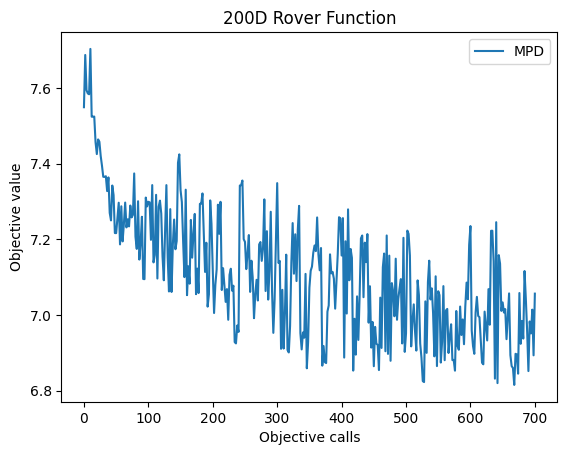

In [69]:
import matplotlib.pyplot as plt

plt.plot(objective_calls_index, objective_vals, label='MPD')
plt.xlabel('Objective calls')
plt.ylabel('Objective value')
plt.title('200D Rover Function')
plt.legend()
plt.savefig("mpd-best.png")